In [50]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [51]:
df = pd.read_csv('NationalNames.csv')
df.columns

Index([u'Id', u'Name', u'Year', u'Gender', u'Count'], dtype='object')

In [52]:
male_bible_names = set(pd.read_csv('male-bible-names.txt', header=None).loc[:, 0])
female_bible_names = set(pd.read_csv('female-bible-names.txt', header=None).loc[:, 0])

In [77]:
def plot_name_trend(male_name_set, female_name_set):
    male_fracs = []
    female_fracs = []

    years = xrange(df['Year'].min(), df['Year'].max() + 1, 1)

    for year in years:
        df_year = df.loc[(df['Year'] == year), :]
        pop_count = 1. * df_year['Count'].sum()

        male_count = df_year.loc[df_year['Name'].apply(lambda x : x in male_name_set)]['Count'].sum()
        female_count = df_year.loc[df_year['Name'].apply(lambda x : x in female_name_set)]['Count'].sum()

        male_frac, female_frac = male_count / pop_count, female_count / pop_count

        male_fracs.append(male_frac)
        female_fracs.append(female_frac)

    male_fracs = np.array(male_fracs)
    female_fracs = np.array(female_fracs)

    fig = plt.figure(figsize=(15, 6))

    male_ax = fig.add_subplot(1, 2, 1)
    female_ax = fig.add_subplot(1, 2, 2)

    male_ax.scatter(years, male_fracs, color='blue', marker='x')
    female_ax.scatter(years, female_fracs, color='red', marker='x')

    male_ax.set_xlim(1879.5, 2010.5)
    female_ax.set_xlim(1879.5, 2010.5)

    male_ax.set_title('Fraction of males given biblical names')
    female_ax.set_title('Fraction of females given biblical names')

    male_ax.set_xlabel('year')
    male_ax.set_ylabel('fraction')

    female_ax.set_xlabel('year')
    female_ax.set_ylabel('fraction')
    
    male_ax.grid(False)
    female_ax.grid(False)

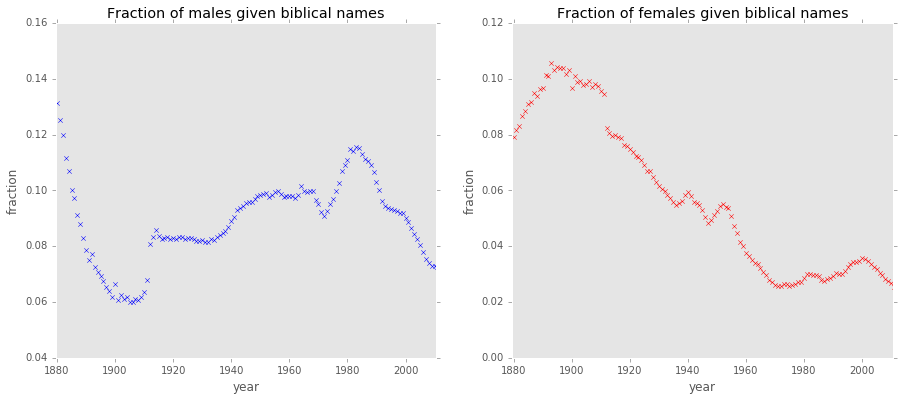

In [78]:
plot_name_trend(male_bible_names, female_bible_names)